In this CA2 I need to visualize the LDA and PCA in order to compare which is better to be used for the machine learning accuracy F1 score for the my data analysis of the dataset that is given to us to perform and use the  GridSearch CV. Th

### Impoart Libraries 

In [1]:
import pandas as pd
import numpy as np 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

The first thing that I do is to do list all the libraries because I will used to do my data analysis for the given dataset for our CA2. This will also help me to avoid restating the libraries everytime I will do my analaysis. 

In [2]:
df = pd.read_csv ("NHANES_age_prediction.csv")

The second thing I did is to load the dataset and and start my data analysis. the df means dataframe and the csv means the name of the dataset that I want to do my analysis. 

In [3]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


I used because I want to visualize the first 5 rows of the dataset.  This will help me to undersatand the columns numerical value. And also determine which column has the categorical value. 

In [4]:
df.tail()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99
2277,83727.0,Adult,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76


I used this because I wanted to show the last five rows of the dataset and this will guide me to understand that the age_group is the categorical varaible and the other features columns has the numerical varaiables. 

In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


I used this because this will help me to understand if there is any data  incompatibilities, but as I have seen there is no incompatabilities on the dataset. There is dtypes float 9 and it has one object. 

# Exploratory Data Analysis 

In [6]:
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


I used df.describe to show the attribute of the dataset and to see the number of means. This helps me understand the mean average value of each column. The std shows the amount of change in the data and determines how it expands the values that come from the mean. The min shows the values of each column from higher to lower. Also, it helped me understand the numerical columns properly. (pandas.pydata.org, n.d.).

In [7]:
df['SEQN'].unique()

array([73564., 73568., 73576., ..., 83713., 83718., 83727.])

I used this because I want to know the unique value of the SEQN column. This will help me to understand the array values for my data cleaning analysis. 

In [8]:
df['age_group'].unique()

array(['Adult', 'Senior'], dtype=object)

I used this because I want to see the categorical that has not produce the numeric value. And the array help me to see the adult and senior label on the column of age_group.

In [9]:
df.isnull().sum()

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

I used this because I want to know if the dataset has a null values or missing values. As I execute the code there is no missing values in the dataset. 

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2273    False
2274    False
2275    False
2276    False
2277    False
Length: 2278, dtype: bool

I used this because I want to make sure there is no null values or missing values in the dataset. It is false because there is no null values in the dataset. This will help me to analyse a provide quality analysis on how I will clean the dataset. 

# Removing irrelevant/not meaningfull columns

In [11]:
#Drop the  Sequence Number 
df_new = df.drop(columns=('SEQN'), index=1)
df_new.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
2,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
5,Adult,50.0,1.0,2.0,23.6,110.0,2.0,100.0,6.08


I used this because I want to do my data cleaning as I think the SEQN columns is not necessary to used for my further analysis so I decide to drop it. 

In [12]:
df_new.shape

(2277, 9)

I used this because I want to show that I already successfully drop the SEQN column.  That is why it shows 2227 rows and 9 columns. 

In [13]:
df_new["age_group"].unique()
df_new["age_group"].value_counts()

age_group
Adult     1913
Senior     364
Name: count, dtype: int64

I used this because I want to have a thorough understanding of the unique value and the hanling the vvalue counts of the age group column. I gives me the adult value which is 1913 as stated above, and Senior value has 364. It also has an int64. This will help me understand how many is the total of adult and senior in the dataset.  

In [14]:
df_new.columns

Index(['age_group', 'RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU',
       'DIQ010', 'LBXGLT', 'LBXIN'],
      dtype='object')

I used this to visulize the dataframe and consist the 9 columns that I have for the new dataframe. Since I successfully drop the column that I see that is not necessary to used for the continuation of my data analysis. 

In [15]:
df_new['age_group'].replace('Senior', 0, inplace = True)
df_new['age_group'].replace('Adult', 1, inplace = True)

I used this because I want to properly convert the categorical value to a numerical value in order for the prepation of the modelling and  machine learning analysis later since machine learning did not read a categorical value.Machine learning only read numbes,furthermore It will help me to provide a better analysis. 

In [16]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

df_new.RIAGENDR= le.fit_transform(df_new.RIAGENDR)
df_new.PAQ605 = le.fit_transform(df_new.PAQ605)
df_new.DIQ010 = le.fit_transform(df_new.DIQ010)

I used this label encoder because I want preprocess the data to trasform the features columns as I want to provide a better evalaution of the training of the models for my data analysis. 

In [17]:
df_new.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,1,61.0,1,1,35.7,110.0,1,150.0,14.91
2,1,16.0,0,1,23.2,89.0,1,68.0,6.14
3,1,32.0,0,1,28.9,104.0,1,84.0,16.15
4,1,38.0,1,0,35.9,103.0,1,81.0,10.92
5,1,50.0,0,1,23.6,110.0,1,100.0,6.08


I used this because I want to know if I properly tranform the feature columns to a numerical value. This will support me to have basis for how I will properly provide my further evalution. This will help me to give a nice graph as I want to compare later the LDA and PCA which of them is better to use for my machine learning analysis later. 

In [18]:
df_new['DIQ010'].unique()

array([1, 0, 2], dtype=int64)

I used this because I want know the unique value it will help me to better analyze the column of the DIQ010 and as stated in the results there is a numerical value of 1, 0, 2 the column DIQ010 and the dtype has int64. 

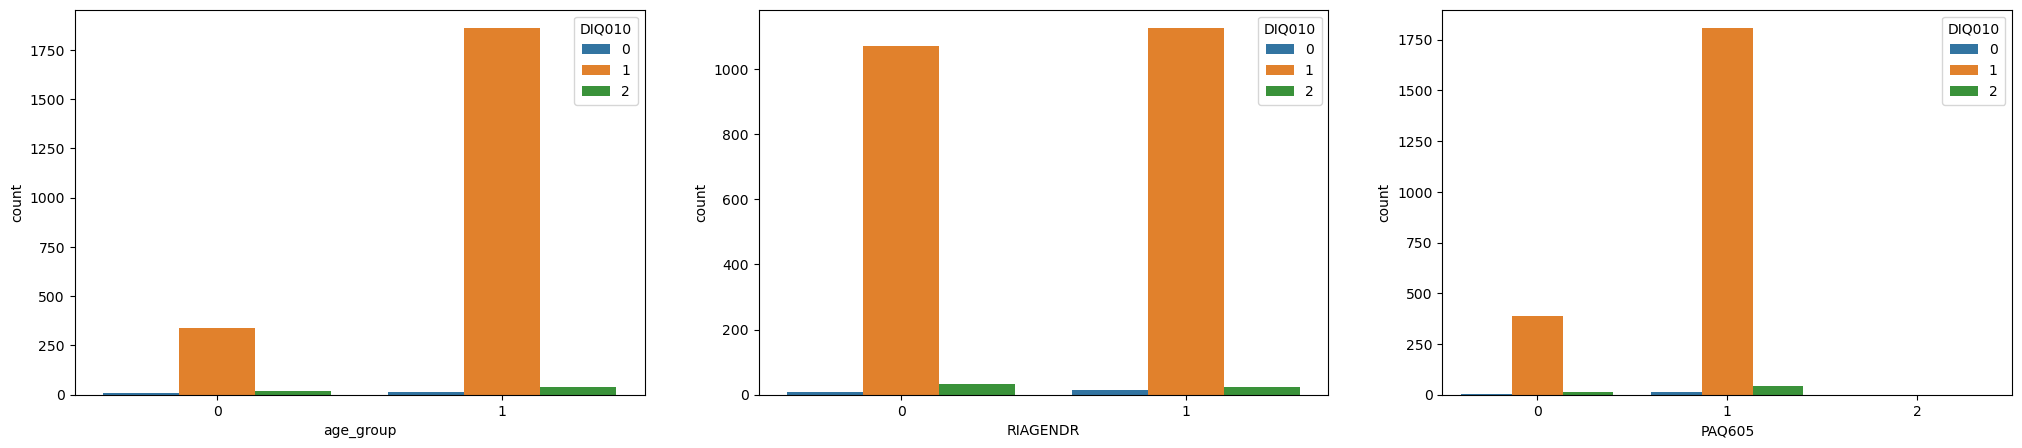

In [19]:
fig, ax = plt.subplots(1,3,figsize=(25,5))
for i, col in enumerate(["age_group","RIAGENDR","PAQ605"]): 
  sns.countplot(data=df_new,
                x=col,
                hue='DIQ010',
                ax=ax[i])

I use because I want to see and understand the proper allocation of the DIQ010 variable through the other categorical and nuemrical columns using the count plot to have a better image of each columns. As I have analyze it is impoetnat to know the realstionship od the target variable with the categorical column which is age group. 

<Axes: xlabel='DIQ010', ylabel='LBXIN'>

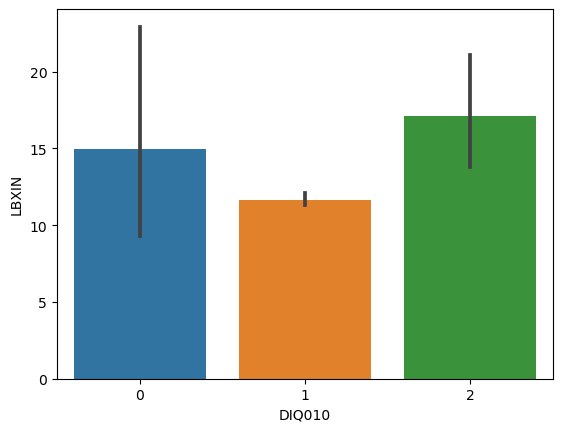

In [20]:
sns.barplot(x='DIQ010', y='LBXIN',data=df_new)

I used this because I want to know the diabetic respondent that has undergo of the blood glucose after fasting. As I have analyze and understand the 0 represent for the diabetic respondent that already have been done undergo the glucose fasting after breakfast, the number 1 represent the respondent that is not yet undergo the blood glucose after fasting, and 2 is the diabetic respondent that has need to schedule for the next blood glucose after fasting on the next day. 

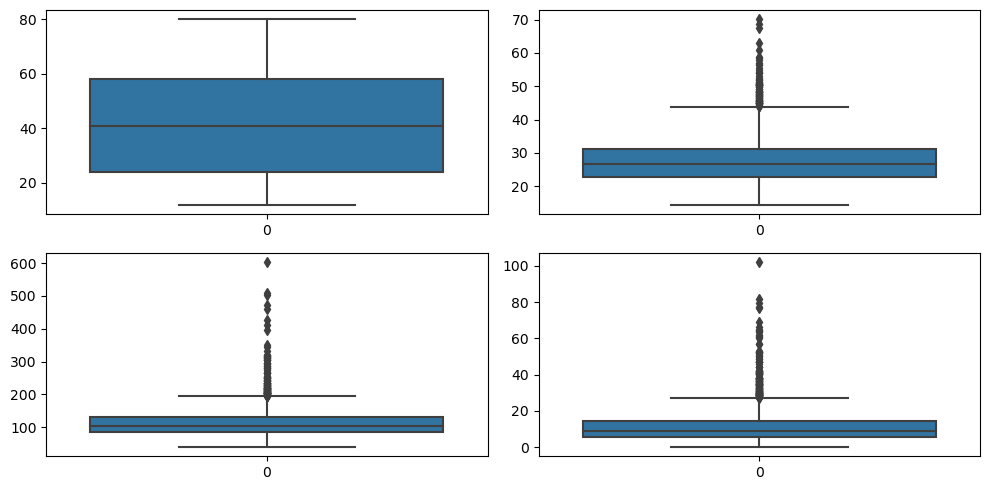

In [21]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(df['RIDAGEYR'], ax = axs[0,0])
plt2 = sns.boxplot(df['BMXBMI'], ax = axs[0,1])
plt3 = sns.boxplot(df['LBXGLT'], ax = axs[1,0])
plt4 = sns.boxplot(df['LBXIN'], ax = axs[1,1])

plt.tight_layout()

I used this because I want to determine if the features columns has an outliers. As i have rememeber in our class discussion the boxplot is good dor undertsanding the data distribution and it has the potential to have a comparison of different variables. This helps me to analyze the minimum and maximum outliers in the data. As i have seen there a little outliers in vertical line of the BMXBMI, LBXGLT, LBXIN. 

In [22]:
# Capital X because there are more than one feature 
  # y - lower case = because it's only one feature. 
    
X = df_new.drop(columns=["DIQ010"])
y = df_new['DIQ010']

X.shape, y.shape

((2277, 8), (2277,))

I used this because this is vital to execute to  show the target variable and the feature in preparation for my machine ro visulize the LDA and PCA properly. I used the shape because I want to understand the shape of the X feature column that has a result of 2277 rows and 8 columns. 

In [23]:
class_feature_means = pd.DataFrame(columns=df_new["DIQ010"])
for c, rows in df_new.groupby('DIQ010'):
    class_feature_means[c] = rows.mean()
class_feature_means

DIQ010,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
age_group,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,...,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224
RIDAGEYR,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,...,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511
RIAGENDR,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,...,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284
PAQ605,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,...,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021
BMXBMI,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,...,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803
LBXGLU,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,...,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028
DIQ010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
LBXGLT,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,...,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389
LBXIN,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,...,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321


I used this because I want to see the class features of the DIQ10 and this give me a constant class value of 1 because c I used the label in coding to tranpose it to 1 in preparation for the PCA and LDA, and also for machine learning model. 

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
easy_lda = lda.fit_transform(X, y)

I used to import the Linear discriminant analysis because I want to prorpely perform the analysis of LDA graph. The easy LDA will help me to accurately fit the target variable in oredr for me to provide a better analysis. As i have undestand during we have this lesson in class this is a supervised machine learning algorithm. 

In [25]:
easy_lda  

array([[ 0.85925811,  0.49250595],
       [-1.19226268, -0.69006504],
       [-0.3725803 ,  0.32600783],
       ...,
       [ 0.00715763,  0.7537236 ],
       [-0.2769358 ,  0.15287498],
       [-0.06666746, -0.96188162]])

I used this because easy lda I can used this as an input in order for me to have allocation or classification of the model. As i execute the code I have it gives a accurate resukt of the classification of the array than using the old or original features. And the array give the accurate results of transforming the data in preparation for modelling. 

In [26]:
lda.explained_variance_ratio_

array([0.93220947, 0.06779053])

I used this code because it properly provide the array results of the varaince that will help me to have a nice graph on  LDA analysis. This help me to undesrtand the efficiency of the variance ratio which has the array result of 0.93220947, 0.06779053. 

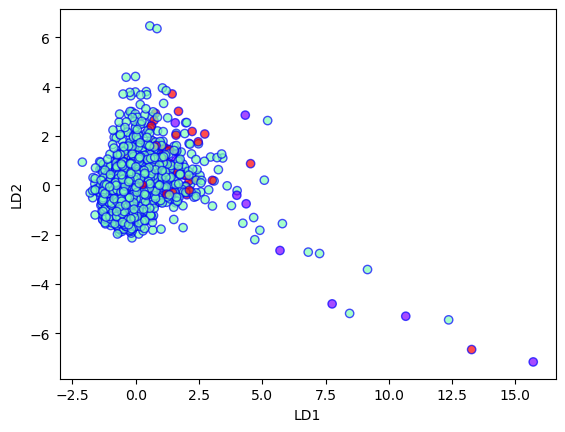

In [27]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    easy_lda[:,0],
    easy_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

I used this because I want to determine and see the graph, and as I have seen the groups is going down and it is not good to used for machine learning modelling the LDA because the group is going down and as I analyze it it will cause underfitting of the model. 

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

I used this libraries and code because I want to execute the PCA correctly, The libraries is vital serve as a primary guide before excecuting any codes to avoide some errors.Then after I import the libraraies I used the code for the preparation of my PCA analysis. 

In [29]:
pca.explained_variance_ratio_

array([0.78738857, 0.11729488])

I used this because it will help me to better understnd the variance ratio that will be produce in graph later for me to undetsand if the PCA will produce a accurate results of graph in order for me to decide if I can used it for machine leraning modelling. 

In [30]:
X_pca

array([[ 39.34631469, -13.2462734 ],
       [-51.79551506,  17.70053923],
       [-29.5368704 ,   6.09429238],
       ...,
       [  8.57287538,  10.32311262],
       [ -6.74297253, -20.1399049 ],
       [ -7.26276743,  14.07061861]])

I used this because I want to know that the data is transformed properly in reducing the dimention of the space. In preparation as I have underatnd the array result which has sa two dimdntionala array it has the PCA1 and PCA2. That will serve as the basis for my graph analysis. 

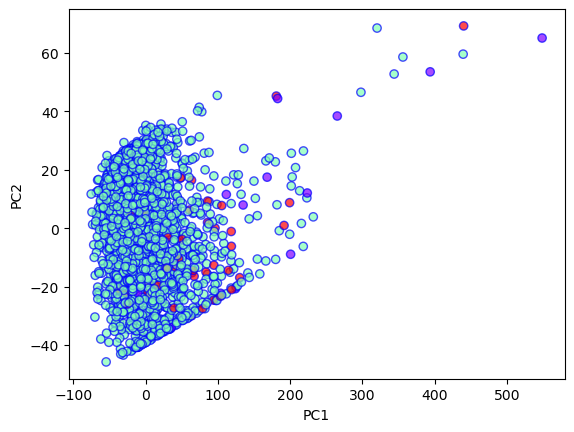

In [31]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

I used this because I want to know and visalualize the result of the variance graph of the PCA1 and PCA2. As the graph show I analyze and undertsand it that PCA is more accurate to be used for machine learning modelling because the variance is goes up a little and it will provide a machine learning accurate results. In case it will provide overfitting I can used the GridSearch CV to reduce the overfitting. 

#### KNN 

In [32]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 42) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1821, 2), (456, 2), (1821,), (456,))

I used this because this is vital step that I need to execute first since it is nice step for estimating the performance of the machine learning algorithm. 

In [33]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 3)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = kNN.predict(X_test)

I used to import the library of the KNeighborsClassifier first because without this it will cause errors. Then I used the number 3 to serve as algorithm in determining the nearest neighbors. And after that I used the code for training the feature. Furthermore, I use the code topredict the labels of the dataset and the y_pred is the one who store the labels taht is predicted. 


In [34]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.97


I use this because I want to know the accuracy of the matrics that help me to undertsand how well the model perform which give the accuracy result of 0.97. 

<Axes: >

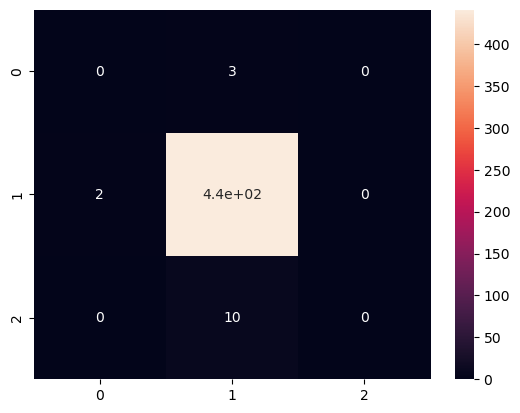

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Call a method predict by using an object classifier 'cls_svm'
y_predict = kNN.predict(X_test)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

I used this confusion matrix because the target varaible that I choose has 0, 1, 2  value of numbers that is why I want to understand the true and false or the correct and incorrect prediction of 0, 1, 2. 

In [36]:
from sklearn.metrics import classification_report

# Display the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.97      1.00      0.98       443
           2       0.00      0.00      0.00        10

    accuracy                           0.97       456
   macro avg       0.32      0.33      0.33       456
weighted avg       0.94      0.97      0.96       456



I used this to visualize the evaluation F1 scre which has the accuracy result of 0.97. 

In [37]:
import numpy as np
neighbors = np.arange(1, 11)                  
train_accuracy = np.zeros(len(neighbors))     
test_accuracy = np.zeros(len(neighbors))      

I used this because I want to put the number of neighbors and execute the declare and initialise the matrix. 

In [38]:
for i, k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 10
    kNN = KNeighborsClassifier(n_neighbors = k)            # Initialise an object knn using KNeighborsClassifier method

    # Fit the model
    kNN.fit(X_train, y_train)                              # Call fit method to implement the ML KNeighborsClassifier model

    # Compute accuracy on the training set
    train_accuracy[i] = kNN.score(X_train, y_train)        # Save the score value in the train_accuracy array

    # Compute accuracy on the test set
    test_accuracy[i] = kNN.score(X_test, y_test)           # Save the score value in the train_accuracy array

 I used this to fit the model for training and testing of the knn score in preparation to visaulize the graph. 

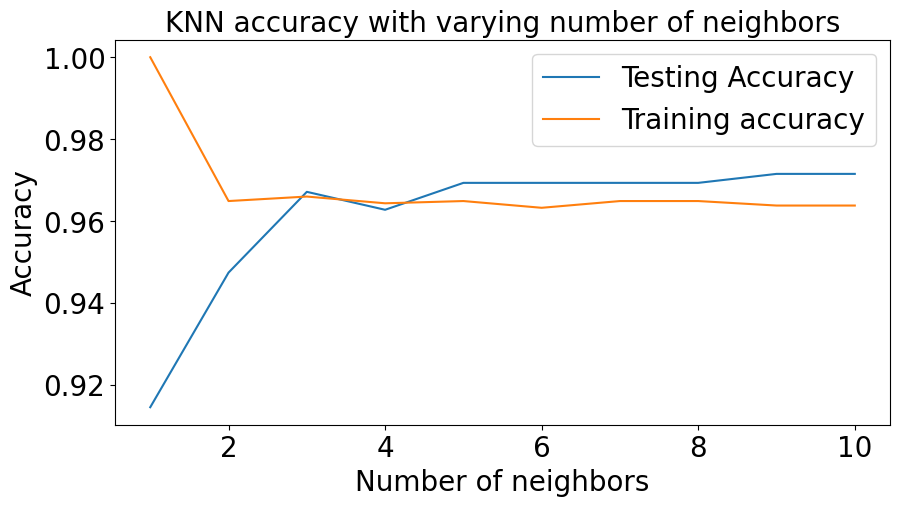

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

I used because I want to visualize the accuray results of the number of nighbors that will provide accuracy graph. 

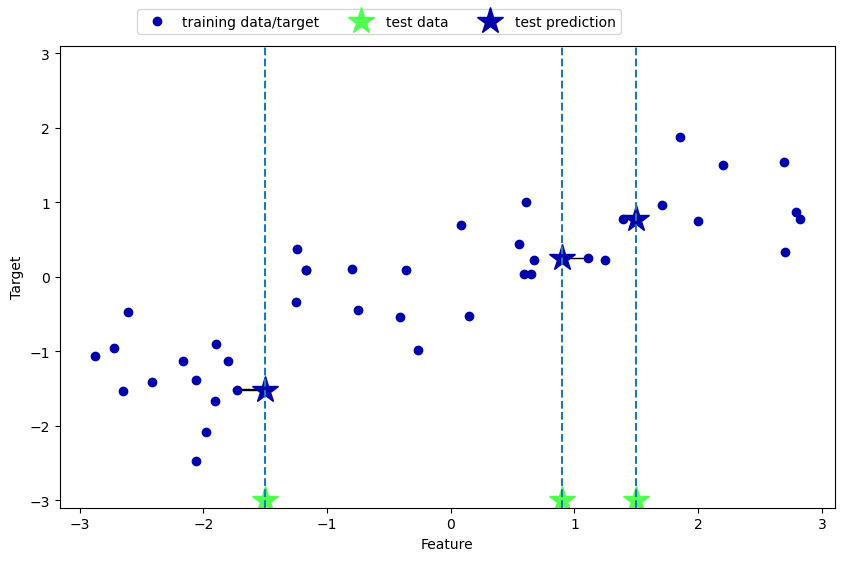

In [40]:
# import the libraries
import mglearn 
import matplotlib.pyplot as plt

# plot k-neighbors regression with n_neighbors = 1
mglearn.plots.plot_knn_regression(n_neighbors = 1)

I used this to show the plot of the nearest neighbors and as I have seen it didnt plot a good k nearest neighbors since i have only 1 nearest neighbor. 

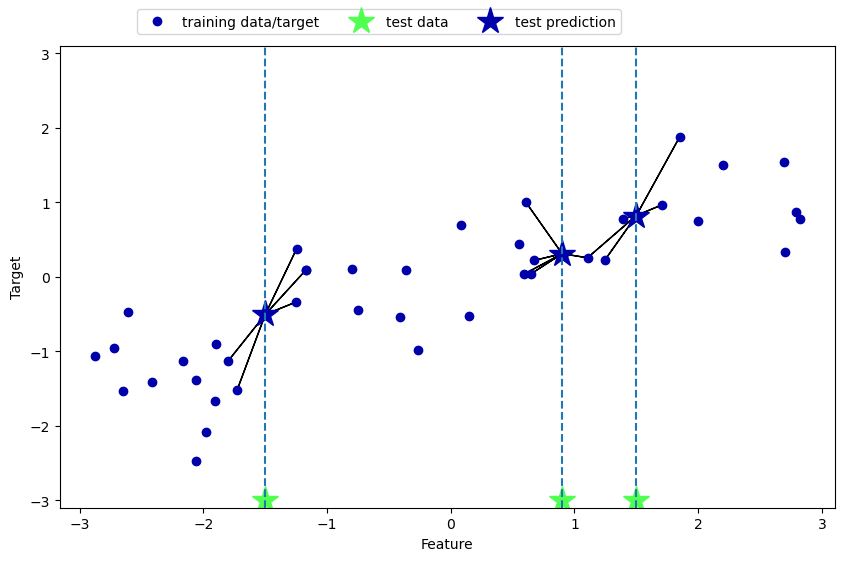

In [41]:
# plot k-neighbors regression with n_neighbors = 3
mglearn.plots.plot_knn_regression(n_neighbors = 5)

I used this because I want to visualize the nearest neighbors by y-axis target and x-axis feature using 3 nearest neighbors on each test data. It shows that there are 5 nearest neighbor connected with line into the test prediction centered in the test data as it  clearly stated above. 

In [42]:
from sklearn.neighbors import KNeighborsRegressor

# Generate the data using make_wave() function
X, y = mglearn.datasets.make_wave(n_samples = 40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors = 3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

I used this because I want to have the kneighbors regresssion and i have put the 40 sample before I split for training. I aslo put the 3 nearest neighbors.  After that I used to fit the continuos target values based on the features. 

In [43]:
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors = 3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

print(X,y)

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]] [-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.95652133
  0.03527881 -2.08581717 -0.4741103

I used this becaus I want to have a step by step of training and test set to provide the result of the X and y regression fit using the 3 nearest neighbor. 

In [44]:
# Predict the results for X_test
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


I used his because I want to provide the test set prediction results of the X test regresssion. 

In [45]:
# Calculate the R^2 score
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


I used because I want to see if the regression is properly fit the linear model in KNeighborsRegressor which has the result of 0.83, this help me to see the effectiveness of the regression.

#### DecisionTreeClassifier

In [46]:
X = df_new.drop(columns=["DIQ010"])
y = df_new['DIQ010']

I used this because this is my target varaibale and features. 

In [47]:
from sklearn.model_selection import train_test_split

# Assuming X_pca and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=42)


I used this because this is the library of the train test split chich ic important to implement first to avoid errors. And since I prefer to use the PCA for machine learning model I put X pca and y as my target variable. 

In [48]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=3)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

I use this because it help me to prepare the decision tree classifier to have a better fitting of the hyperparameter using the max depth of 3. 

In [49]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.97      1.00      0.98       663
           2       0.00      0.00      0.00        16

    accuracy                           0.96       684
   macro avg       0.32      0.33      0.33       684
weighted avg       0.94      0.96      0.95       684



I used this because I want to see the f1 accuracy result of the decission tree classifierconfusion matrix that give the result of 0.96. 

In [50]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[  0   5   0]
 [  3 660   0]
 [  0  16   0]]
0.9649122807017544


I used this because I want to have see the confurion matrix having the 0.96 accuracy result. In prediction result there is true positive 660, False positive 5, false negative 16, and false negative 3 values. 

[Text(0.5, 0.875, 'x[0] <= 44.718\ngini = 0.071\nsamples = 1593\nvalue = [16, 1535, 42]'),
 Text(0.25, 0.625, 'x[1] <= 1.355\ngini = 0.04\nsamples = 1411\nvalue = [6, 1382, 23]'),
 Text(0.125, 0.375, 'x[1] <= 1.344\ngini = 0.072\nsamples = 702\nvalue = [6, 676, 20]'),
 Text(0.0625, 0.125, 'gini = 0.069\nsamples = 701\nvalue = [6, 676, 19]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.375, 0.375, 'x[1] <= 4.411\ngini = 0.008\nsamples = 709\nvalue = [0, 706, 3]'),
 Text(0.3125, 0.125, 'gini = 0.028\nsamples = 71\nvalue = [0, 70, 1]'),
 Text(0.4375, 0.125, 'gini = 0.006\nsamples = 638\nvalue = [0, 636, 2]'),
 Text(0.75, 0.625, 'x[0] <= 182.248\ngini = 0.279\nsamples = 182\nvalue = [10, 153, 19]'),
 Text(0.625, 0.375, 'x[0] <= 45.04\ngini = 0.242\nsamples = 169\nvalue = [6, 146, 17]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.6875, 0.125, 'gini = 0.234\nsamples = 168\nvalue = [5, 146, 17]'),
 Text(0.875, 0.375, 'x[0] <= 20

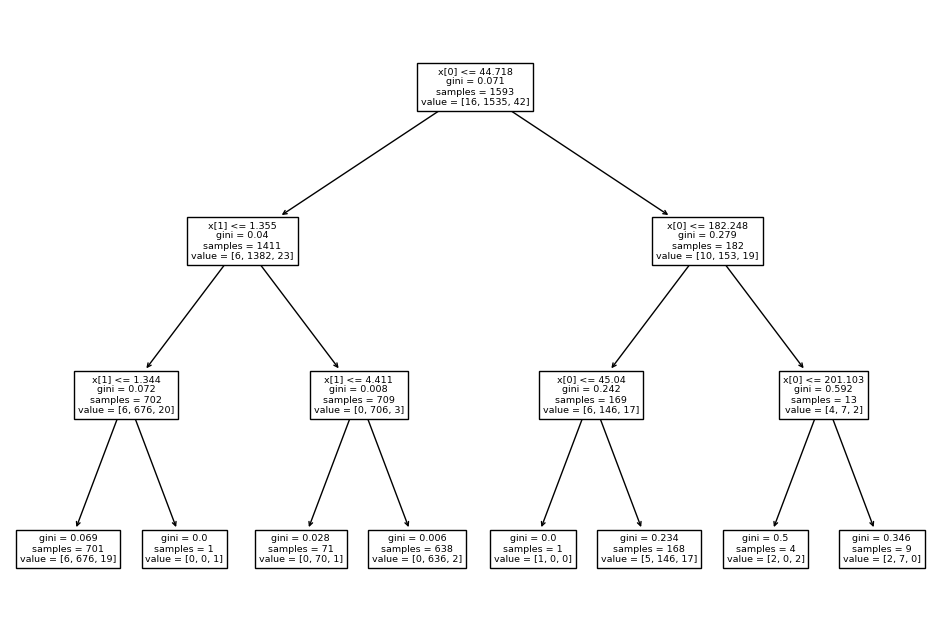

In [51]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(dt_default) 

I used this because i want to see the tree plot of the decission tree classifier having a 0.96 accuracy result. 

In [52]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 2),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 2)},
             verbose=1)

I used this because I want to improve the models and reduce the accuracy result of decission tree classifier using the max depth  and the criterion. This will help me to improve the model accuracy score. 

In [53]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001693,0.001970,0.002029,0.004059,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.959248,0.956113,0.956113,0.962264,0.959119,0.958571,0.002301,2
1,0.003322,0.006128,0.003328,0.006164,entropy,7,"{'criterion': 'entropy', 'max_depth': 7}",0.956113,0.949843,0.952978,0.959119,0.955975,0.954806,0.003151,3
2,0.005186,0.001048,0.000990,0.000070,entropy,9,"{'criterion': 'entropy', 'max_depth': 9}",0.946708,0.946708,0.952978,0.949686,0.952830,0.949782,0.002772,6
3,0.000248,0.000497,0.003321,0.006641,entropy,11,"{'criterion': 'entropy', 'max_depth': 11}",0.949843,0.940439,0.949843,0.943396,0.949686,0.946641,0.003969,7
4,0.006177,0.007568,0.000000,0.000000,entropy,13,"{'criterion': 'entropy', 'max_depth': 13}",0.943574,0.934169,0.949843,0.940252,0.949686,0.943505,0.005935,8
5,0.003125,0.006250,0.000000,0.000000,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.956113,0.962382,0.952978,0.962264,0.962264,0.959200,0.003928,1
6,0.006368,0.006830,0.000000,0.000000,gini,7,"{'criterion': 'gini', 'max_depth': 7}",0.943574,0.959248,0.949843,0.955975,0.962264,0.954181,0.006717,4
7,0.003145,0.006289,0.000000,0.000000,gini,9,"{'criterion': 'gini', 'max_depth': 9}",0.949843,0.956113,0.946708,0.952830,0.955975,0.952294,0.003623,5
8,0.007390,0.004595,0.000200,0.000400,gini,11,"{'criterion': 'gini', 'max_depth': 11}",0.924765,0.949843,0.931034,0.930818,0.946541,0.936600,0.009785,10
9,0.005207,0.000400,0.000597,0.000488,gini,13,"{'criterion': 'gini', 'max_depth': 13}",0.934169,0.949843,0.940439,0.933962,0.943396,0.940362,0.005973,9


I used this because I want to have a thorough analysis of the hyperparameter tuning. It help me to assure that the model will  perfomed well. 

In [54]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9592003312237534
DecisionTreeClassifier(max_depth=5)


I used this because I want to know if I properly implement to improve the model using the GridSearchCV. And as stataed the accuracy result is 0.95 which help to reduce and improve the  model using the mas depth of 5. 

In [55]:
# Find the highest accuracy value
cv_results['mean_test_score'].max()

# The depth of the tree is 9 for this accuracy

0.9592003312237534

I used tgis because I want to know the the highest accuracy using the max depth of 9. And it gives the result of 0.95. 

In [56]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=9)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=100)

I used this because I want to improve the model accuracy using the max depth of 9. 

In [57]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9342105263157895

I used this because because I want see if I properly improve the model and as stated above from 0.95 accuracy it reduce to 0.93 which I improve the model accuracy score. 

[Text(0.59423828125, 0.95, 'x[0] <= 44.718\ngini = 0.071\nsamples = 1593\nvalue = [16, 1535, 42]'),
 Text(0.3916015625, 0.85, 'x[1] <= 1.355\ngini = 0.04\nsamples = 1411\nvalue = [6, 1382, 23]'),
 Text(0.283203125, 0.75, 'x[1] <= 1.344\ngini = 0.072\nsamples = 702\nvalue = [6, 676, 20]'),
 Text(0.267578125, 0.65, 'x[0] <= 23.509\ngini = 0.069\nsamples = 701\nvalue = [6, 676, 19]'),
 Text(0.125, 0.55, 'x[1] <= -17.968\ngini = 0.057\nsamples = 618\nvalue = [4, 600, 14]'),
 Text(0.078125, 0.45, 'x[1] <= -18.121\ngini = 0.093\nsamples = 247\nvalue = [3, 235, 9]'),
 Text(0.0625, 0.35, 'x[1] <= -28.266\ngini = 0.086\nsamples = 246\nvalue = [3, 235, 8]'),
 Text(0.03125, 0.25, 'x[1] <= -32.527\ngini = 0.02\nsamples = 99\nvalue = [0, 98, 1]'),
 Text(0.015625, 0.15, 'gini = 0.0\nsamples = 63\nvalue = [0, 63, 0]'),
 Text(0.046875, 0.15, 'x[1] <= -32.462\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.03125, 0.05, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.0625, 0.05, 'gini 

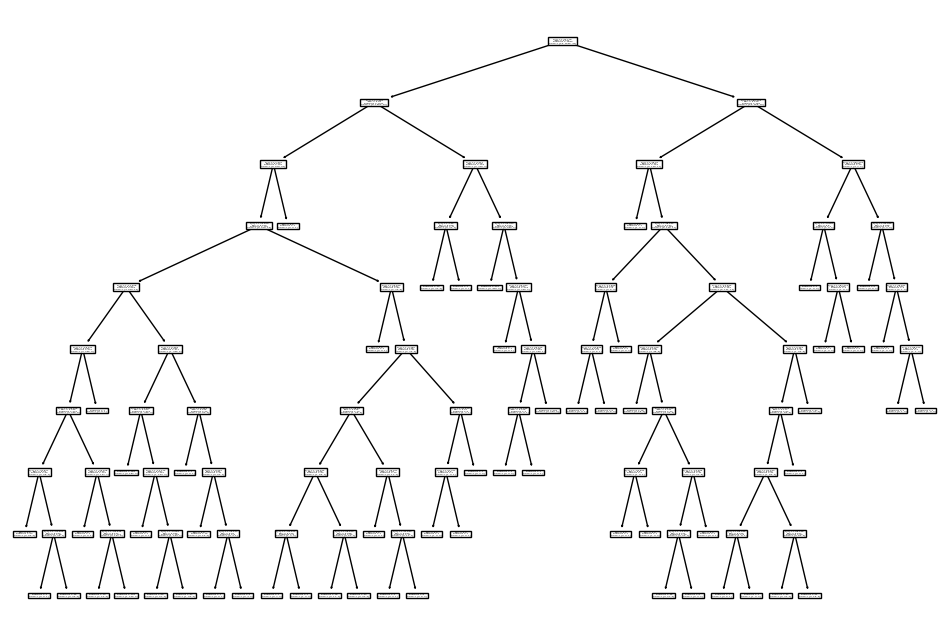

In [58]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini)

I used this because I want to see the tree plot of the 0.93 accuracy score and as I seen it and analyze. The higher max depth it results to treeplot to be more compress the plot at appear smaller as it reduce the accuracy score. 

In [59]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.9692982456140351


I used this because I want to see compare if I used lower max depth of 3 it will improve the image of the treeplot of the decision tree classifier. 

[Text(0.5769230769230769, 0.875, 'x[0] <= 44.718\ngini = 0.071\nsamples = 1593\nvalue = [16, 1535, 42]'),
 Text(0.3076923076923077, 0.625, 'x[1] <= 1.355\ngini = 0.04\nsamples = 1411\nvalue = [6, 1382, 23]'),
 Text(0.15384615384615385, 0.375, 'x[0] <= 23.509\ngini = 0.072\nsamples = 702\nvalue = [6, 676, 20]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.06\nsamples = 619\nvalue = [4, 600, 15]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.157\nsamples = 83\nvalue = [2, 76, 5]'),
 Text(0.46153846153846156, 0.375, 'x[1] <= 4.411\ngini = 0.008\nsamples = 709\nvalue = [0, 706, 3]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.028\nsamples = 71\nvalue = [0, 70, 1]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.006\nsamples = 638\nvalue = [0, 636, 2]'),
 Text(0.8461538461538461, 0.625, 'x[0] <= 94.011\ngini = 0.279\nsamples = 182\nvalue = [10, 153, 19]'),
 Text(0.7692307692307693, 0.375, 'x[1] <= -9.407\ngini = 0.213\nsamples = 119\nvalue = [4, 105, 10]'),
 Text(0.6923076923076923, 0.125, 'g

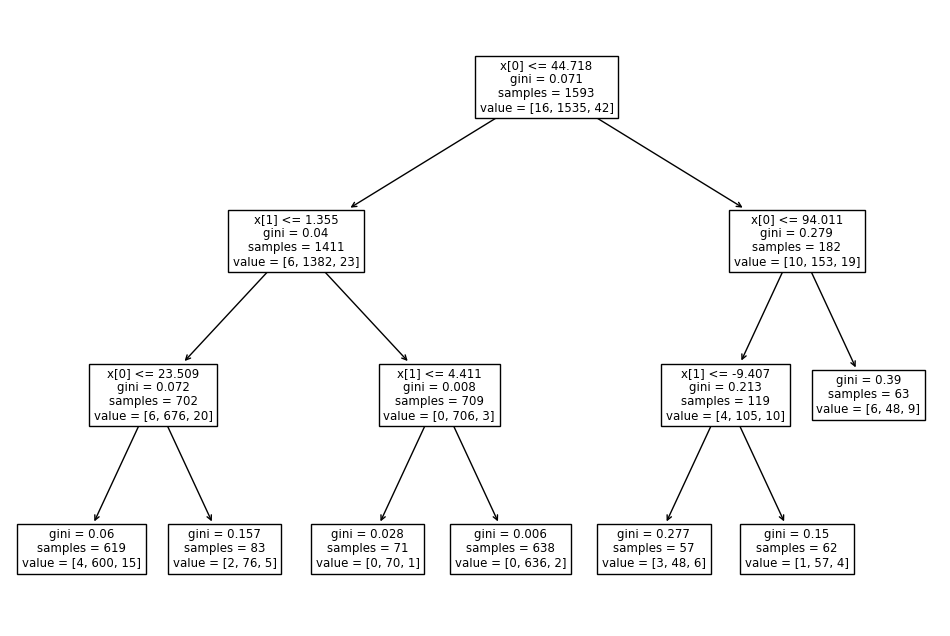

In [60]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini)

I used this because I want to visaulize if I peroperly improve the image of the treeplot of the decisiion tree classifier. And as stated It is well improve the plot image of the decission tree classifier. 

In [61]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.97      1.00      0.98       663
           2       0.00      0.00      0.00        16

    accuracy                           0.97       684
   macro avg       0.32      0.33      0.33       684
weighted avg       0.94      0.97      0.95       684



I used this because I want to visualize the confusion matrix score since I used the amx depth of 3. the result is 0.97 which if I used lower max depth it will give me a highger accurcy score. 

In [62]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[  0   5   0]
 [  0 663   0]
 [  0  16   0]]


I used this because I want see the true positive that has a 663 and false negative that has 16 value. As I used the lower max depth it gives me higher accuracy result and reduce the confusion matrix result of class prediction. 

### Random Forest

In [63]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=101)

I used this because I want execute the train test split accurately using the X_pca.

In [64]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

I used this because it is vital to implement the library of random forest classifier before fitting the training test. 

In [65]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

I used this because I want to determine the properly fitting of the X train and y train for random forest classifier.

In [66]:
# Making predictions
predictions = rfc.predict(X_test)

I used this because it is very important to do the prediction test in order for me to prepare the accuracy prediction score. 

In [67]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

I used this because this is very important to implement before I can execute and visualize the accuracy score of the random forest. 

In [68]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.97      0.99      0.98       663
           2       0.00      0.00      0.00        14

    accuracy                           0.96       684
   macro avg       0.32      0.33      0.33       684
weighted avg       0.94      0.96      0.95       684



I used this because I want to see the accuracy score of the random forest classifier. Which has the result of 0.96 accuracy score. 

In [69]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[  0   6   1]
 [  1 654   8]
 [  0  14   0]]


I used this because I want to know the confusion matrix in order for me tho find the correct and the wrong prognosis. This give me the true positve 655 and false negative 14. 

In [70]:
print(accuracy_score(y_test,predictions))

0.956140350877193


I used this because I want see the accuracy of the random forest which give me the result of 0.95 accuracy. 

In [71]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 40, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 40, 5)}, scoring='accuracy')

I used this because I want to improve the model accuracy using the max depth of the Gridsearch CV having the kfold of 5. 

In [72]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.170061,0.035746,0.004476,0.003689,2,{'max_depth': 2},0.962382,0.962382,0.962382,0.965409,0.965409,0.963593,0.001483,1
1,0.245880,0.010306,0.008201,0.005048,7,{'max_depth': 7},0.962382,0.962382,0.959248,0.962264,0.959119,0.961079,0.001549,2
2,0.291111,0.023866,0.009807,0.006294,12,{'max_depth': 12},0.962382,0.962382,0.959248,0.959119,0.959119,0.960450,0.001578,3
3,0.305163,0.023992,0.013637,0.004920,17,{'max_depth': 17},0.962382,0.962382,0.959248,0.952830,0.959119,0.959192,0.003488,6
4,0.283204,0.020593,0.012527,0.005091,22,{'max_depth': 22},0.959248,0.962382,0.956113,0.959119,0.955975,0.958567,0.002369,8


I used this because I want to to see that the hyperparameter that I used perform well. 

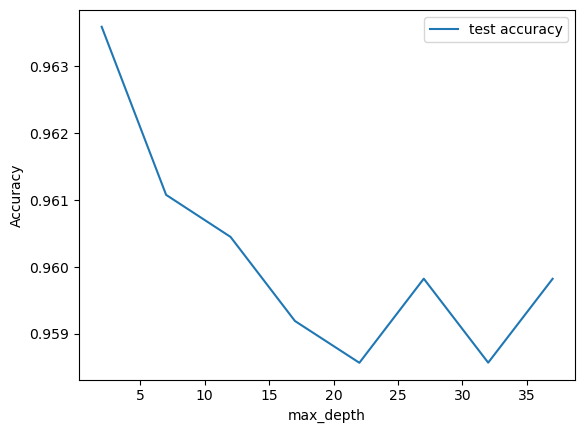

In [73]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

I used this because I want to see that when I increase the max depth it will give me the graph like an elbow graph in which as i increase the max depth it will give reduced the accuracy value from 0.97 to 0.95.

In [74]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [30,25,40],
    'min_samples_leaf': range(300, 500, 400),
    'min_samples_split': range(300, 700, 300),
    'n_estimators': [200,300, 400], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

I used this because this will help me to have the parameter for better improvement of the performance of the Random forest classifier. 

In [75]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [30, 25, 40], 'max_features': [5, 10],
                         'min_samples_leaf': range(300, 500, 400),
                         'min_samples_split': range(300, 700, 300),
                         'n_estimators': [200, 300, 400]},
             verbose=1)

I used this because I want to implement the  proper fitting of the X train and y train. This will help me to understand starting to search the best hyperparameter to train the model. 

In [76]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9635907093534213 using {'max_depth': 30, 'max_features': 5, 'min_samples_leaf': 300, 'min_samples_split': 300, 'n_estimators': 200}


I used this because I want to know the accuracy of the random forest using the GrisSearchCV thatgive the 0.96 accuracy result. 

In [77]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

I use this because this will help me to provide a new prediction of the best hyperparameter.  

In [78]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

I used this because I want to make a prediction using the max depth of 10 which I want to see if I will improve the model as I used a higher max depth. 

In [79]:
# predict
predictions = rfc.predict(X_test)

I used this code because I want to know the imporatant prediction using the random forest classifier that will help me to understand the model performance and the support decision making. 

In [80]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

I used this library first  of the classification report of confusion matrix because it is necessary to execute this to properly perform the accuracy using the precision, recall, f1-score, and support. 

In [81]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.97      1.00      0.98       663
           2       0.00      0.00      0.00        14

    accuracy                           0.97       684
   macro avg       0.32      0.33      0.33       684
weighted avg       0.94      0.97      0.95       684



I used this to because I want to visualize the accuracy of the random forest using the classificareport of the confusion matrix. This help me to understand well that the f1-score is the most accurate provide the accuracy which give the 0.97. 

In [82]:
print(confusion_matrix(y_test,predictions))

[[  0   7   0]
 [  0 663   0]
 [  0  14   0]]


I used this because I want to see that the true positive has the value of 663 , the false negative showed the 14 value, and  false positive has the value of 7. 

##### Kmeans Clustering 

In [83]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2277, 8), (2277,), (1707, 8), (570, 8), (1707,), (570,))

I used this because I want have the right way on preparing the training and testing which give the 2277 rows and 8 columns of the dataset. 

In [84]:
from sklearn.preprocessing import StandardScaler

# Create an object using Standard scalscaler
scaler = StandardScaler()

# Train the StandardScaler model
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# print dataset after scaling
print(X_train_scaled, '\t', X_test_scaled, '\t', X_scaled)

[[ 0.44390843 -1.30249219  0.97397646 ... -0.76280889 -0.82769051
  -0.78767257]
 [ 0.44390843 -0.80608589 -1.02671886 ...  0.46439092 -0.15347168
  -0.84004633]
 [ 0.44390843 -0.90536715 -1.02671886 ... -0.42811804 -0.42737308
  -1.0065949 ]
 ...
 [-2.25271683  1.37810182  0.97397646 ...  2.02628159  0.77357922
   0.22418855]
 [ 0.44390843  0.48457048 -1.02671886 ... -1.04171794 -0.09026366
  -1.21923238]
 [-2.25271683  1.87450812  0.97397646 ... -0.14920899  1.44779805
  -0.74786851]] 	 [[ 0.44390843  0.38528922  0.97397646 ... -0.37233623 -0.51165043
  -0.78034024]
 [-2.25271683  1.87450812  0.97397646 ... -0.59546346 -0.42737308
   0.01574097]
 [ 0.44390843 -1.30249219  0.97397646 ... -0.31655442 -0.27988771
   0.16343498]
 ...
 [-2.25271683  1.57666434 -1.02671886 ... -0.31655442 -0.27988771
  -0.97098074]
 [-2.25271683  1.42774245 -1.02671886 ...  0.79908177 -0.53271977
   1.14491932]
 [ 0.44390843 -0.21039833  0.97397646 ...  0.01813644 -0.89089853
  -0.54989568]] 	 [[ 0.4439084

I used this because I know this is vital step in preprocessing that will lead to fundamental effect of the performace and stability of the models of machine learning.   

In [85]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

print(X, y)

[[-7.94152277e-01  2.10495117e+00]
 [-9.15155186e+00 -4.81286449e+00]
 [-1.14418263e+01 -4.45781441e+00]
 [-9.76761777e+00 -3.19133737e+00]
 [-4.53655648e+00 -8.40186288e+00]
 [-6.26302115e+00 -8.10666081e+00]
 [-6.38481234e+00 -8.47302970e+00]
 [-9.20490564e+00 -4.57687928e+00]
 [-2.76017908e+00  5.55121358e+00]
 [-1.17104176e+00  4.33091816e+00]
 [-1.00364080e+01 -5.56912090e+00]
 [-9.87589123e+00 -2.82386464e+00]
 [-7.17532921e+00 -8.77059017e+00]
 [-2.40671820e+00  6.09894447e+00]
 [-4.87418245e+00 -1.00495890e+01]
 [-6.07854700e+00 -7.93969420e+00]
 [-6.83238762e+00 -7.47067670e+00]
 [-2.34673261e+00  3.56128423e+00]
 [-1.03415662e+01 -3.90975169e+00]
 [-1.10926243e+01 -3.78396611e+00]
 [-6.50212109e+00 -7.91249101e+00]
 [-1.02639310e+01 -3.92073400e+00]
 [-6.81608302e+00 -8.44986926e+00]
 [-1.34052081e+00  4.15711949e+00]
 [-1.03729975e+01 -4.59207895e+00]
 [-7.37499896e+00 -1.05880659e+01]
 [-6.62351774e+00 -8.25338334e+00]
 [-1.35938959e+00  4.05424002e+00]
 [-1.97451969e-01  2

I used this because I want to understand the two dimentional data which is the X and y by the used of make blobs is a vital step to do examining and understanding the clustering algorithm and to show the values of the X and y. 

In [86]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=3)

# build the clustering model
kmeans = KMeans(n_clusters=3)

# Train the model
kmeans.fit(X)

KMeans(n_clusters=3)

I used this because it is vital to implement first the libraraies to avoid error upon I execute of the next code i will do to implement. This will help me to have appropriate clustering labels results of the kmeans.

In [87]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 0 0 0 1 0 0 1 0 2 0 1 1 1 2 0 1 1 0 0 2 2 0 2 0 1 1 2 0 1 2 2 1 0 1 1 2
 2 2 1 1 1 2 2 0 0 2 0 1 0 2 1 0 1 0 1 0 1 2 2 2 0 2 2 0 2 1 0 2 0 0 1 2 0
 2 2 0 2 1 0 2 2 2 2 1 2 0 1 2 1 2 1 1 0 1 0 0 2 1 1]


I used this because I want to visualize better analyze the clustering results. This help me to understand the how the data points is are o=proprly group to provide the accurate clustering results. 

In [88]:
print(kmeans.predict(X))

[1 0 0 0 1 0 0 1 0 2 0 1 1 1 2 0 1 1 0 0 2 2 0 2 0 1 1 2 0 1 2 2 1 0 1 1 2
 2 2 1 1 1 2 2 0 0 2 0 1 0 2 1 0 1 0 1 0 1 2 2 2 0 2 2 0 2 1 0 2 0 0 1 2 0
 2 2 0 2 1 0 2 2 2 2 1 2 0 1 2 1 2 1 1 0 1 0 0 2 1 1]


I used this because I want to visualize the prdeicted cluster label of the X variable. 

In [89]:
import mglearn

I use this library to properly execute the kmeans graphs. 

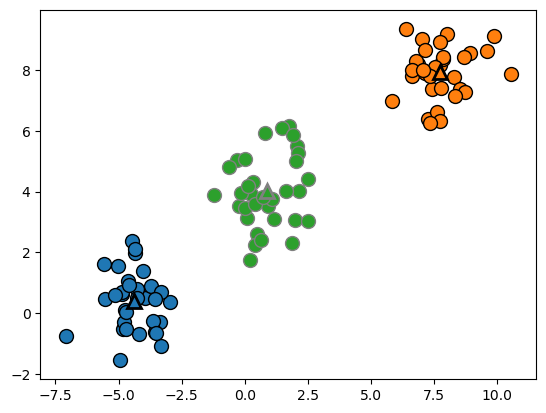

In [90]:
# Use mglearn to plot the graph
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')

mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2)

I used this because I want to understand thoroughly using the scatter plot represent the outcome the k means clustering. As showed in the graph there are three kmeans that is cluster it has been clearly showed that the k random points serve as the starting pointis and it is well clustered and after the k mean point is well clustered and the mean point is on the center of each three cluster. 

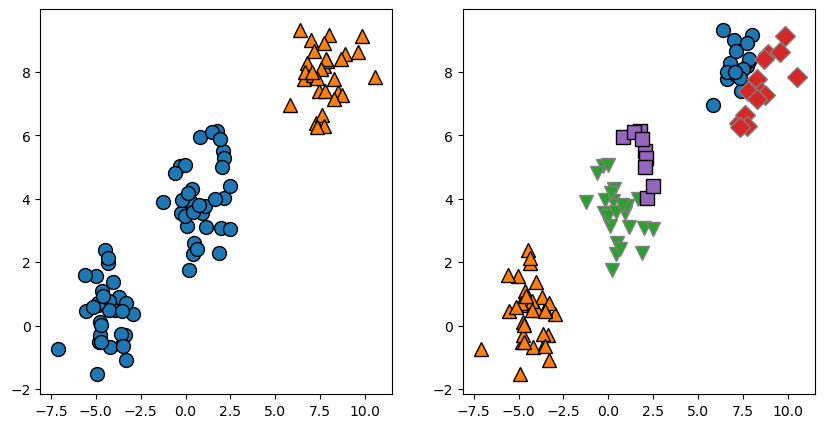

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2, random_state=38 )
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# using five cluster centers:
kmeans = KMeans(n_clusters=5, random_state=38)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

I used this because I want to see the and compare of using the 2 clusters and using the five cluster. AsI have analyze the two cluster has a better image of tsluster of the kmenas because the points is well evalautaed as showed in the graph. Whilke the five clusters has a a more compress visalixation of the kmeans. 

Text(0, 0.5, 'Feature 1')

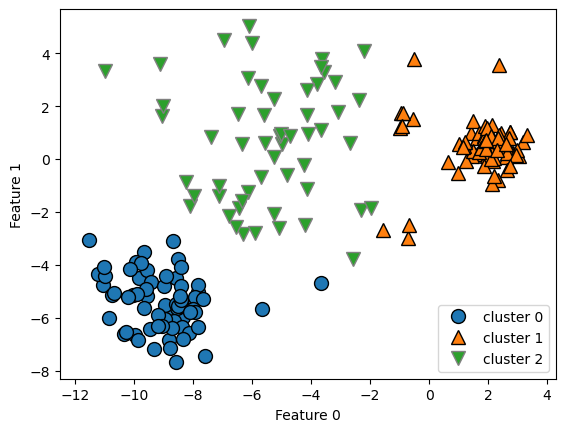

In [92]:
X_varied, y_varied = make_blobs(n_samples=200,
cluster_std=[1.0, 2.5, 0.5],
random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

I used this because I want to visualize the prediction of the 3 clusters.As I analyze and understand the cluster 0 has the most accurate kmenas because the points of the euclidean distance is well datermine and visulaize than the cluster 1 and cluster 2. 

In [93]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import math

I used to implement the libraries first because this is very important since it will serve as a guide for the analysis that I want to execute. It will help data analytic students like me abstain from code restating. Without these libraries, it will cause errors in performing data analysis.

In [94]:
kmeans_NHANES= KMeans(n_clusters = 3)
kmeans_NHANES.fit(X)
C = kmeans_NHANES.labels_
C.shape
assign_NHANES= C.reshape(-1, 1)

I usd this because I want to properly implement the kmenas clustering of the X which is the features variables. This help me to understand that I need to used reshape for my further analysis. 

In [95]:
X = df_new.drop(columns=["DIQ010"])
y = df_new['DIQ010']

I used this because this is my fetres and target varabes that is vital to execute first before performing my further analysis. 

In [96]:
print(X.columns)

Index(['age_group', 'RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU',
       'LBXGLT', 'LBXIN'],
      dtype='object')


I used this to visualize the feature columns and know the dtype which is the object. 

In [97]:
print(X.head())

   age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  LBXGLT  LBXIN
0          1      61.0         1       1    35.7   110.0   150.0  14.91
2          1      16.0         0       1    23.2    89.0    68.0   6.14
3          1      32.0         0       1    28.9   104.0    84.0  16.15
4          1      38.0         1       0    35.9   103.0    81.0  10.92
5          1      50.0         0       1    23.6   110.0   100.0   6.08


I used this because I want to show the numerical value of each features columns. 

In [98]:
X = pd.DataFrame(X).reset_index(drop=True)

I used this because this help me to execute the unsupervised clustering, appointing the datapoint to the designated cluster. 

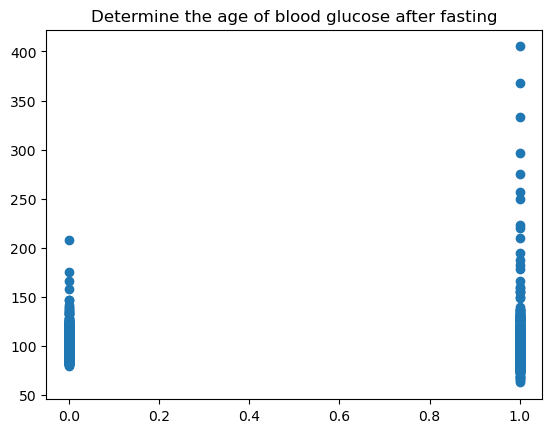

In [99]:
plt.scatter(X['age_group'], X['LBXGLU'])
plt.title('Determine the age of blood glucose after fasting')
plt.show()


I used this because I want to know the age group that undergo the blood glucose after fasting. As showed in the graph the age group has the lower variance with the senior age than the non senoor age because it has 250 variance in the y axis. while the non senior has the high blood glucose after fasting because it has the variance in the y axis 400. 

In [100]:
import numpy as np

# To plot the cluster data, consider two columns
X1 = X['age_group']
X2 = X['LBXGLU']

# Transform into numpy array
X11 = X1[:, ]
X22 = X2[:, ]

# Display rows and columns of the arrays
X11.shape, X22.shape, assign_NHANES.shape

((2277,), (2277,), (100, 1))

I used this to because this is vital to execute in order to have the tranformation of the feature and target variable to numpy array in preparation to see the rows of the colums of the dataset as it need to be shape before performing the kmenas and the silhouette score. 

In [101]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

# Instantiate the kMeans models
km =KMeans(n_clusters = 2,random_state=42)

# Fit the Khleans model
km.fit_predict(X)

# Catculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')

# Print the score
print ('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.538


In [102]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

# Instantiate the kMeans models
km =KMeans(n_clusters = 3,random_state=42)

# Fit the Khleans model
km.fit_predict(X)

# Catculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')

# Print the score
print ('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.416


In [103]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

# Instantiate the kMeans models
km =KMeans(n_clusters = 4,random_state=42)

# Fit the Khleans model
km.fit_predict(X)

# Catculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')

# Print the score
print ('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.314


I used this because I want to have the accuracy score of the silhouette score using different kmenas nearest cluster.This help me to undestand that as I used the 2 k means nearest cluster it will give me a higher silhouetter score of 0.538. Also as I used the kmenas nearest cluster 3 it will give me the moderate Silhouette score of 0.416. And lastly if I used the the kmenas nearest cluster 4 it will give me the lower Silhoutter score. The higher the k means nearest cluster the lower will be the results of the silhouetter score. 

7031057.549622573
4039285.34857912
2840931.2877287483
2242674.773565934
1891592.143176425
1588756.4778740623
1394307.7973056273
1275521.040655608
1176225.31782052
1109604.6008803942


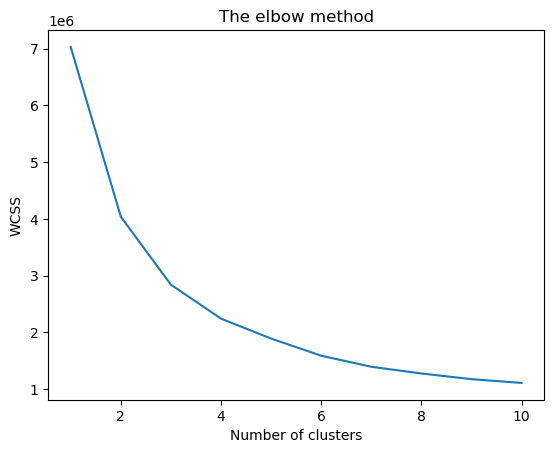

In [104]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

I used this because I want to visualize the within cluster sum square which is in the y axis. As showed in the graph the cluster 1 within cluster sum of squares is very high in the 7 variance value in the y axis. Then as it move to the second cluster it reduce the to the variance of 4 in the y axis. As it move to the third cluster it showed that it has more reduced  to the variance of 3 in the y axis, until it moves to more cluster it will gradually reduce the within cluster sum of squares.   

Concluion:

Over all, In this CA 2 of data preparation and machine learning I develop another more knowledge of comparing the results of the PCA and LDA which one I will need to use for the machine learning modelling. based on the graph of the PCA is more accutete to be used for training the machine learning models.And I choose the DIQ010 as my target and feature variable because as I check the unique numerical value of that is perfect for using for the class analysis in applying the PCA in machine learning both to supervised and unsupervised machine learning. But when I used label encoding it only give me the class value as I execute the code of class feature using my target and feature varaible. I have experience errors as I execute the code but I do my best to resolve it using the code notes from our class discussion and it help me to solve the errors accurately. I used the 3 supervised machine leraning models to see and compare which has the better accuracy, and as I do my analysis decission tree classifier is the best model that give me the efficeint accurary of 0.93 that will not cause overfitting and underfitting as i used the max depth of 9.I do perform the unsupervised k means because I choose the PCA to use to train the model for machine learning and it give me more understandin that by using the higher the k means nearest cluster the lower will be the results of the silhouetter score. Furthermore,  the elbow graph is giving the accurate understanding that from the cluster 1 and it moves to cluster 2 and to cluster 3 it will have the detailed reduction of the variance of the y axis going to the x axis.  

References: 

archive.ics.uci.edu. (n.d.). UCI Machine Learning Repository. [online] Available at: https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset.


pandas.pydata.org. (n.d.). pandas.DataFrame.describe — pandas 1.0.3 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html.